In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from pandas_profiling import ProfileReport
from pathlib import Path, PurePath

np.random.seed(42)
%matplotlib inline

In [29]:
data_path = Path().resolve().parent/'data'

train_data = pd.read_csv(data_path/'train.csv')
train_data['ds'] = 'train'
test_data = pd.read_csv(data_path/'test.csv')
test_data['ds'] =  'test'

data = train_data.append([test_data])

target_columns = 'SalePrice'

In [34]:
print(data.shape, train_data.shape, test_data.shape, data['ds'].value_counts())
data.head()

(2919, 82) (1460, 82) (1459, 81) train    1460
test     1459
Name: ds, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ds
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


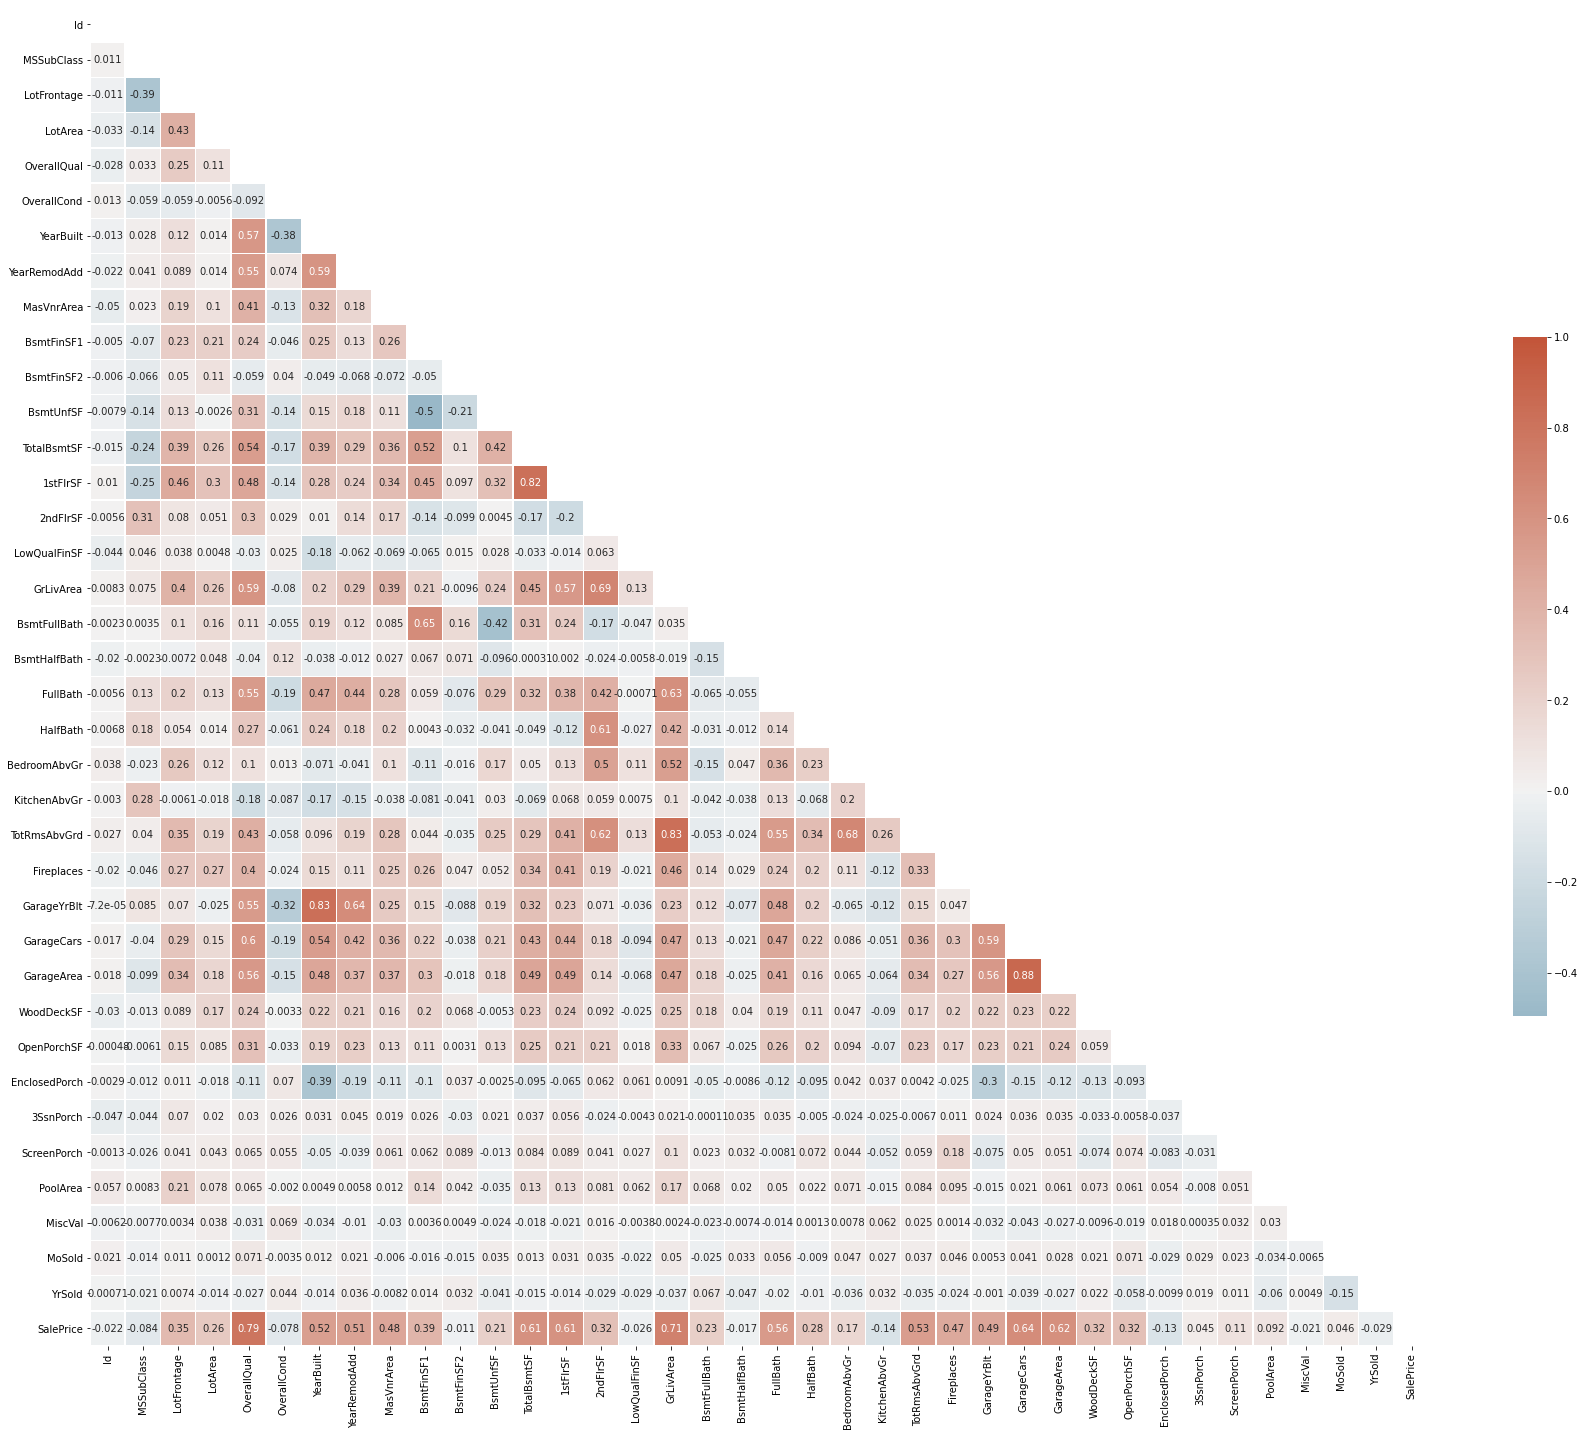

In [24]:
f, ax = plt.subplots(figsize=(30, 25))

mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

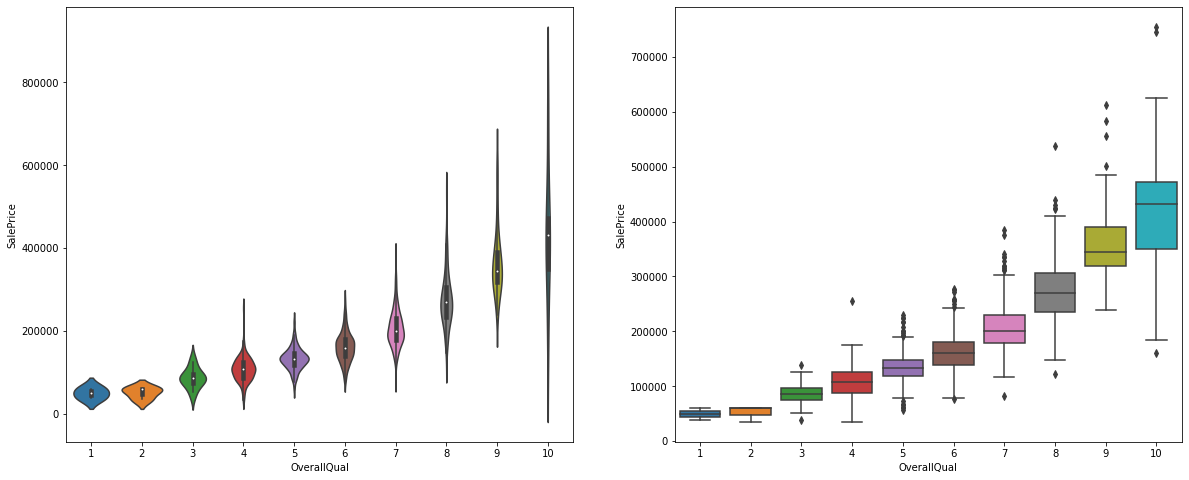

In [36]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

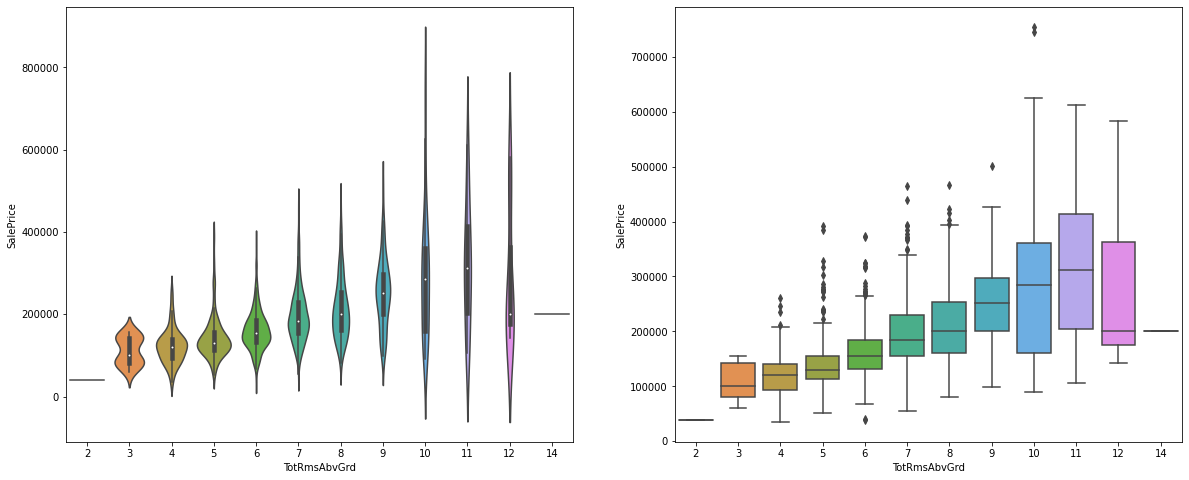

In [30]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
sns.boxplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
plt.show()

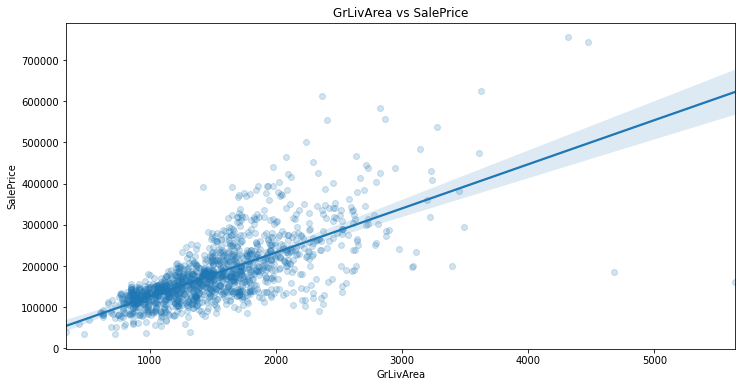

In [42]:
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.show()

<Figure size 1440x432 with 0 Axes>

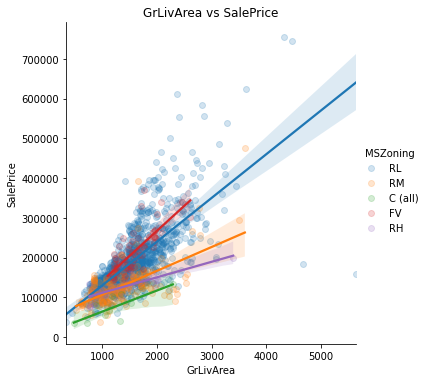

In [45]:
plt.figure(figsize = (20,6))
sns.lmplot(data=train_data, x = 'GrLivArea', y='SalePrice', hue='MSZoning', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.show()

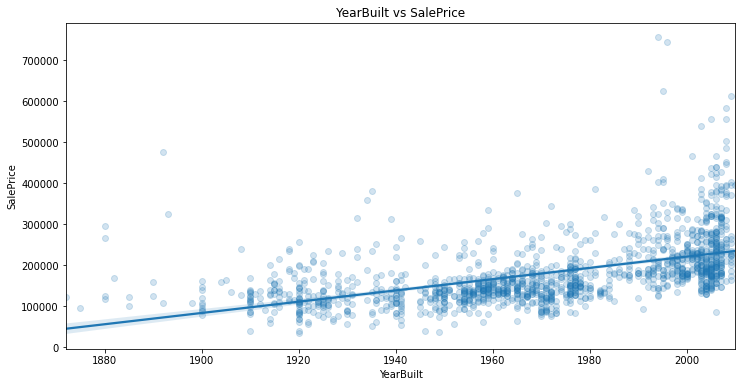

In [47]:
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.show()

<Figure size 864x432 with 0 Axes>

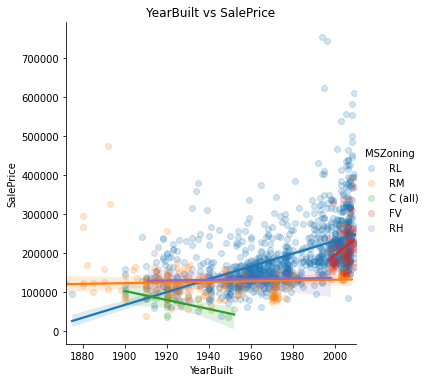

In [48]:
plt.figure(figsize = (12,6))
sns.lmplot(data=train_data, x = 'YearBuilt', y='SalePrice', hue='MSZoning', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.show()

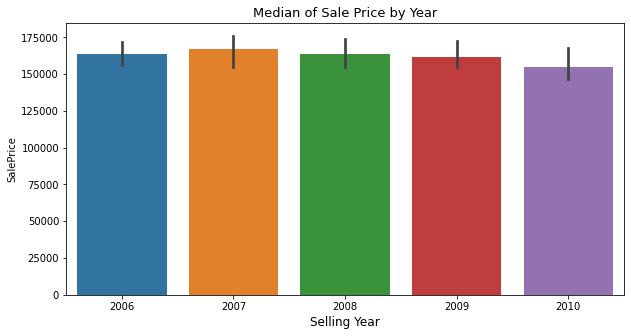

In [50]:
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.show()

In [54]:
data = data.drop(['SalePrice'], axis = 1)

nan = pd.DataFrame(data.isna().sum(), columns = ['NaN_sum'])
# nan['feat'] = nan.index
# nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
# nan = nan[nan['NaN_sum'] > 0]
# nan = nan.sort_values(by = ['NaN_sum'])
# nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
# nan

In [56]:
nan.sort_values(by='NaN_sum', ascending=False).head()

,NaN_sum
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420


In [57]:
data.shape

(2919, 81)